In [1]:
%matplotlib inline

In [2]:
import os
import json
from datetime import datetime
import pandas as pd
from matplotlib.colors import ListedColormap
import calplot

In [3]:
nomie3_file_name = os.path.join('..', 'raw-data', 'nomie.csv')

In [9]:
nomie_df = pd.read_csv(nomie3_file_name, date_parser=['start', 'end'])
nomie_df = nomie_df[nomie_df['emoji'].isin(['🍺', '🥂', '🍷', '🥃', '🚬', '🍸'])]
nomie_df.tail()

,epoch,start,end,tracker,uom,emoji,value,note,lat,lng,location
3404,1577825540000,2019-12-31 15:52:20,2019-12-31 15:52:20,coctail,num,🍸,1.0,#coctail(1),50.221566,12.88107,NaN
3405,1577825240000,2019-12-31 15:47:20,2019-12-31 15:47:20,champagne,num,🥂,1.0,#champagne(1),50.221566,12.88107,NaN
3406,1577823500000,2019-12-31 15:18:20,2019-12-31 15:18:20,champagne,num,🥂,1.0,#champagne(1),50.221566,12.88107,NaN
3407,1577821640000,2019-12-31 14:47:20,2019-12-31 14:47:20,champagne,num,🥂,1.0,#champagne(1),50.221566,12.88107,NaN
3408,1577810840000,2019-12-31 11:47:20,2019-12-31 11:47:20,champagne,num,🥂,1.0,#champagne(1),50.221566,12.88107,NaN


In [25]:
nomie_df['date'] = nomie_df.apply(lambda row: pd.to_datetime(row['start']).floor('D'), axis=1)
nomie_df['year'] = nomie_df.apply(lambda row: pd.to_datetime(row['start']).to_period('Y'), axis=1)
nomie_df.tail()

,epoch,start,end,tracker,uom,emoji,value,note,lat,lng,location,date,year
3404,1577825540000,2019-12-31 15:52:20,2019-12-31 15:52:20,coctail,num,🍸,1.0,#coctail(1),50.221566,12.88107,NaN,2019-12-31,2019
3405,1577825240000,2019-12-31 15:47:20,2019-12-31 15:47:20,champagne,num,🥂,1.0,#champagne(1),50.221566,12.88107,NaN,2019-12-31,2019
3406,1577823500000,2019-12-31 15:18:20,2019-12-31 15:18:20,champagne,num,🥂,1.0,#champagne(1),50.221566,12.88107,NaN,2019-12-31,2019
3407,1577821640000,2019-12-31 14:47:20,2019-12-31 14:47:20,champagne,num,🥂,1.0,#champagne(1),50.221566,12.88107,NaN,2019-12-31,2019
3408,1577810840000,2019-12-31 11:47:20,2019-12-31 11:47:20,champagne,num,🥂,1.0,#champagne(1),50.221566,12.88107,NaN,2019-12-31,2019


In [13]:
def plot_my_fun(df):
    fun_by_date_df = df.groupby(['date']).count().reset_index()[['date', 'tracker']]
    fun_by_date_series = pd.Series(fun_by_date_df['tracker'].values, index=fun_by_date_df['date'])
    max_fun_per_day = max(fun_by_date_series)
    limit_good = 1
    limit_ok = 3
    booze_cmap = ListedColormap(['#99ff66'] * limit_good
                                + ['#f8e447'] * limit_ok
                                + ['#f3a0bc'] * (max_fun_per_day - limit_good - limit_ok))
    calplot.calplot(fun_by_date_series,
                    textformat='{:.0f}',
                    textcolor='#999999',
                    cmap=booze_cmap,
                    linewidth=0.0005,
                    edgecolor='white'
                   )

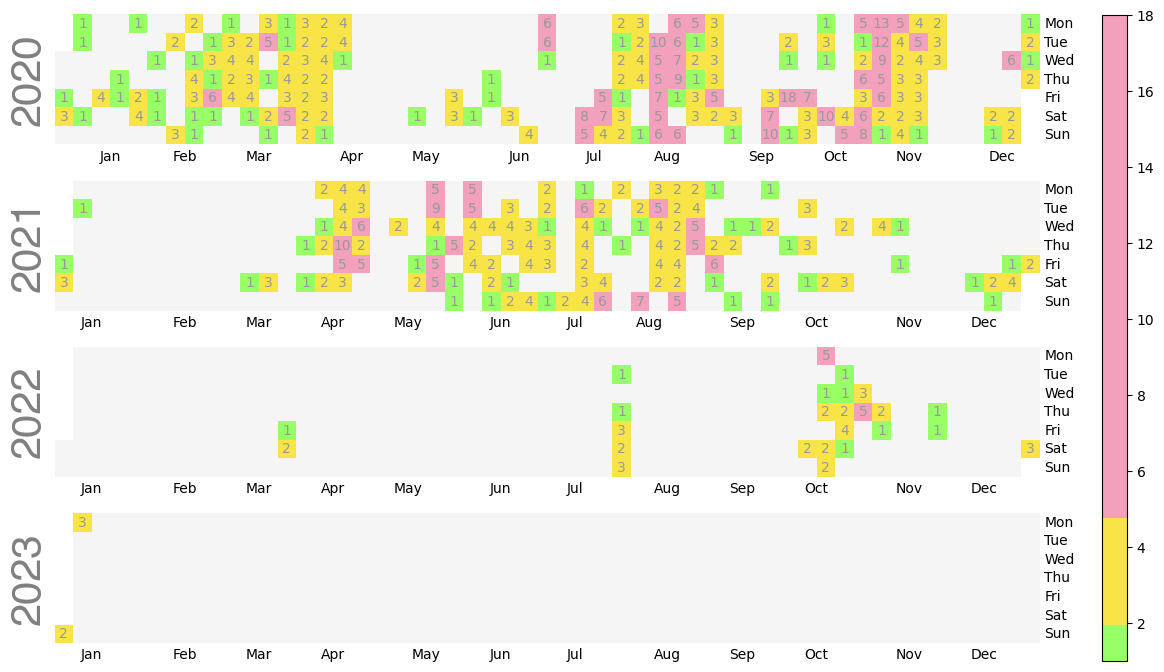

In [14]:
plot_my_fun(nomie_df[nomie_df['emoji'].isin(['🚬'])])

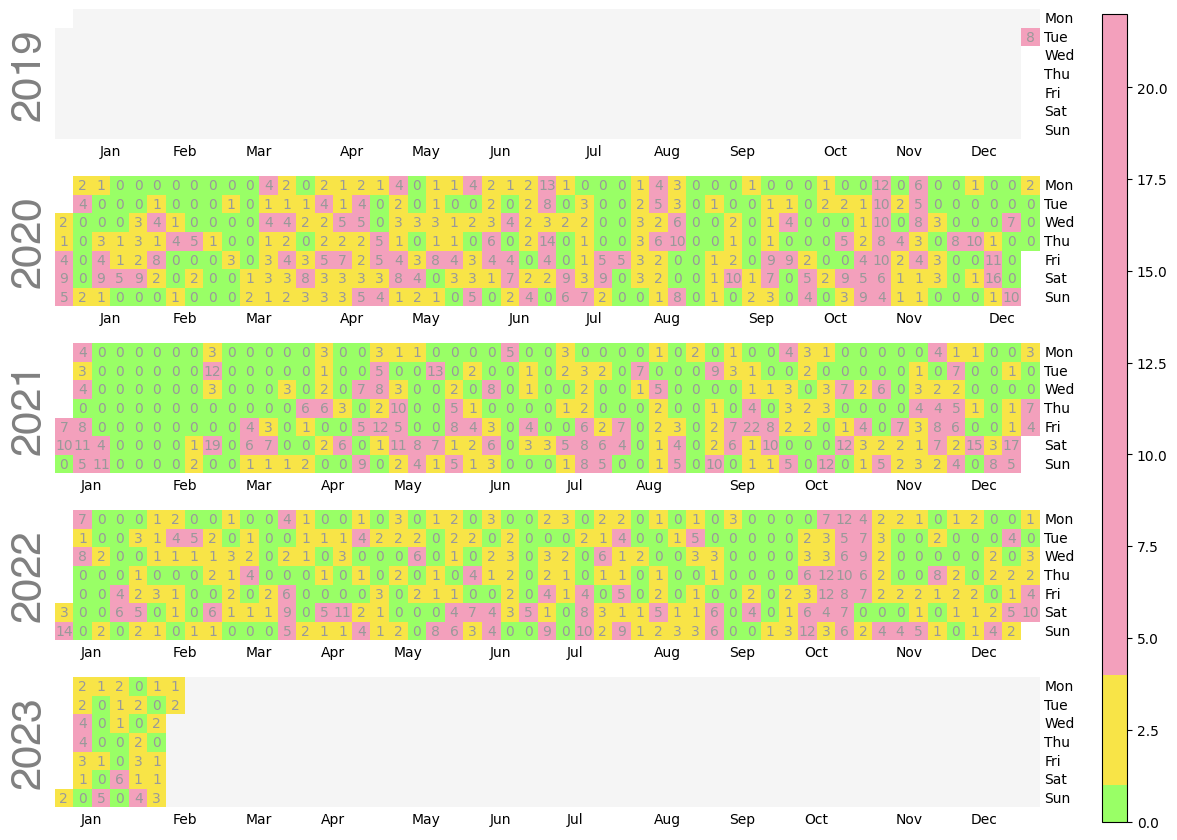

In [15]:
plot_my_fun(nomie_df[nomie_df['emoji'].isin(['🍺', '🥂', '🍷', '🥃', '🍸'])])

In [32]:
# pd.DataFrame(df.groupby(['year', 'steps_cnt_grouped']).count()['date'])
nomie_df_groupped = pd.DataFrame(nomie_df.groupby(['year', 'emoji']).count()['value']).reset_index()
nomie_df_groupped

,year,emoji,value
0,2019,🍸,2
1,2019,🥂,6
2,2020,🍷,232
3,2020,🍸,44
4,2020,🍺,277
5,2020,🚬,577
6,2020,🥂,107
7,2020,🥃,169
8,2021,🍷,85
9,2021,🍸,169


In [34]:
nomie_df_groupped['real_value'] = nomie_df_groupped.apply(lambda row: row['emoji'] * row['value'], axis=1)
nomie_df_groupped

,year,emoji,value,real_value
0,2019,🍸,2,🍸🍸
1,2019,🥂,6,🥂🥂🥂🥂🥂🥂
2,2020,🍷,232,🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷...
3,2020,🍸,44,🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸
4,2020,🍺,277,🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺...
5,2020,🚬,577,🚬🚬🚬🚬🚬🚬🚬🚬🚬🚬🚬🚬🚬🚬🚬🚬🚬🚬🚬🚬🚬🚬🚬🚬🚬🚬🚬🚬🚬🚬🚬🚬🚬🚬🚬🚬🚬🚬🚬🚬🚬🚬🚬🚬🚬🚬...
6,2020,🥂,107,🥂🥂🥂🥂🥂🥂🥂🥂🥂🥂🥂🥂🥂🥂🥂🥂🥂🥂🥂🥂🥂🥂🥂🥂🥂🥂🥂🥂🥂🥂🥂🥂🥂🥂🥂🥂🥂🥂🥂🥂🥂🥂🥂🥂🥂🥂...
7,2020,🥃,169,🥃🥃🥃🥃🥃🥃🥃🥃🥃🥃🥃🥃🥃🥃🥃🥃🥃🥃🥃🥃🥃🥃🥃🥃🥃🥃🥃🥃🥃🥃🥃🥃🥃🥃🥃🥃🥃🥃🥃🥃🥃🥃🥃🥃🥃🥃...
8,2021,🍷,85,🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷🍷...
9,2021,🍸,169,🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸🍸...
